In [1]:
import os
os.getcwd()

'/Users/hidehiro/code/hidehiro98/pyML/notes'

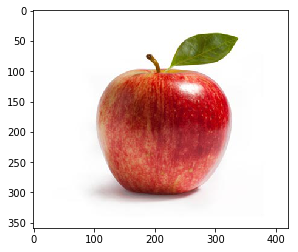

In [3]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

img = load_img('../image/train/apple/0000.jpg')
plt.imshow(img)
plt.show()

In [10]:
import os
labels = sorted(os.listdir('../image/train'))[1:]
labels

['apple', 'grape', 'lemon', 'melon', 'orange', 'strawberry', 'tomato']

In [14]:
img = []
y = []
for d in range(len(labels)):
    for f in os.listdir('../image/train/' + labels[d]):
        if f[-1] == 'g':
            img.append(img_to_array(load_img('../image/train/' + labels[d] + '/' + f, target_size=(128, 128)))/255)
            y.append(d)
            
import numpy as np
X = np.array(img)

In [15]:
X.shape

(721, 128, 128, 3)

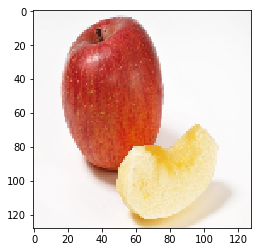

In [17]:
plt.imshow(array_to_img(X[30,:,:,:]))
plt.show()

## ロジスティック回帰

In [19]:
from sklearn.model_selection import train_test_split

X_tr = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, random_state=42, test_size=0.1)

In [20]:
X_tr.shape

(721, 49152)

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
clf.score(X_test, y_test)

0.79452054794520544

## ensemble Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(verbose=True, n_estimators=10)
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        1027.9749            2.96m
         2         876.3907            2.60m
         3         760.6791            2.31m
         4         663.3285            2.07m
         5         580.0531            1.73m
         6         514.2293            1.39m
         7         454.5494            1.04m
         8         405.2815           41.16s
         9         362.6113           20.47s
        10         325.4955            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0,
              verbose=True, warm_start=False)

In [26]:
gbc.score(X_test, y_test)

0.72602739726027399

## CNN

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
__________

In [30]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [31]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
648/648 [==============================] - 42s 64ms/step - loss: 2.0212 - acc: 0.2130
Epoch 2/10
648/648 [==============================] - 45s 69ms/step - loss: 1.5616 - acc: 0.3426
Epoch 3/10
648/648 [==============================] - 37s 57ms/step - loss: 1.2313 - acc: 0.5108
Epoch 4/10
648/648 [==============================] - 37s 58ms/step - loss: 0.9684 - acc: 0.6111
Epoch 5/10
648/648 [==============================] - 34s 53ms/step - loss: 0.7801 - acc: 0.6728
Epoch 6/10
648/648 [==============================] - 41s 64ms/step - loss: 0.6921 - acc: 0.7500
Epoch 7/10
648/648 [==============================] - 41s 64ms/step - loss: 0.7348 - acc: 0.7207
Epoch 8/10
648/648 [==============================] - 38s 58ms/step - loss: 0.4802 - acc: 0.8302
Epoch 9/10
648/648 [==============================] - 34s 53ms/step - loss: 0.5335 - acc: 0.8056
Epoch 10/10
648/648 [==============================] - 36s 55ms/step - loss: 0.3875 - acc: 0.8596


In [32]:
model.evaluate(X_test, y_test)

73/73 [==============================] - 2s 25ms/step


[0.40401371496997468, 0.89041095972061157]